In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
653,ham,Fine i miss you very much.,NaN,NaN,NaN
1687,spam,Free Top ringtone -sub to weekly ringtone-get ...,NaN,NaN,NaN
5258,ham,1 in cbe. 2 in chennai.,NaN,NaN,NaN
3909,ham,She.s good. She was wondering if you wont say ...,NaN,NaN,NaN
2462,ham,"Rose needs water, season needs change, poet ne...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deployment

__1.Data Cleaning__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
3230,ham,No plm i will come da. On the way.
3937,ham,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...
1083,ham,Wat makes some people dearer is not just de ha...
3940,spam,"Free Msg: get Gnarls Barkleys \Crazy\"" rington..."
3300,spam,RCT' THNQ Adrian for U text. Rgds Vatian


In [9]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
247,ham,Kallis wont bat in 2nd innings.
2583,ham,"Goodmorning, today i am late for 1hr."
2189,ham,Yup i shd haf ard 10 pages if i add figures......
1310,ham,"I.ll always be there, even if its just in spir..."
1557,ham,Wat r u doing?


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

__2.EDA__

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23daa6ef580>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

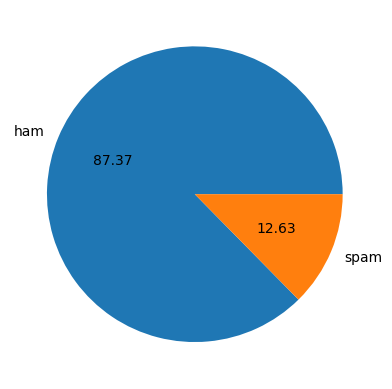

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [21]:
#Data is imbalanced

In [22]:
import nltk


In [23]:
nltk.download('punkt',download_dir = r"D:\nltk_data")

[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
import nltk

# Make sure nltk looks in D:
nltk.data.path.append(r"D:\nltk_data")

# Download required resources into D
nltk.download('punkt', download_dir=r"D:\nltk_data")
nltk.download('punkt_tab', download_dir=r"D:\nltk_data")


[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to D:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
from nltk.tokenize import word_tokenize

df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(str(x))))


In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

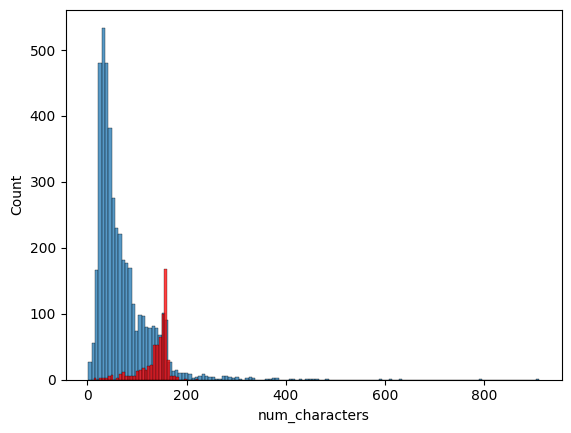

In [35]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

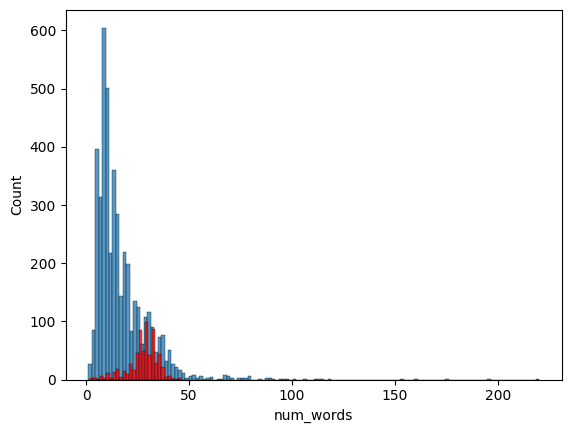

In [36]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

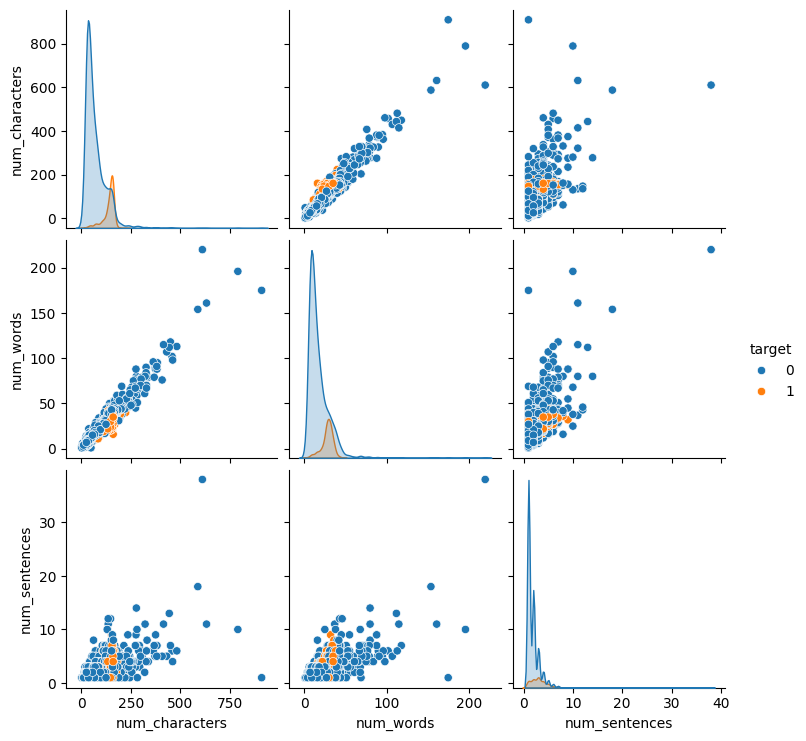

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

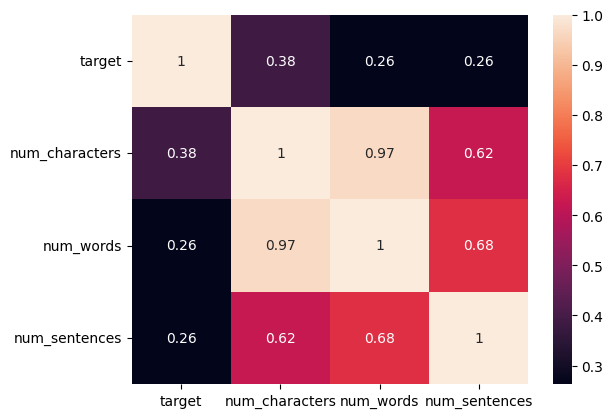

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot =True)


**Data Preprocessing**

- Step 1: Lower case
- Step 2: Tokenization
- Step 3: Removing special characters
- Step 4: Removing stop words and punctuation
- Step 5: Stemming


In [39]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
                 
        
        
    return" ".join(y) 

In [40]:

transform_text('I love YOUTUBE lectures on Machine Learning . How about %% you?')

'love youtub lectur machin learn'

In [41]:
df['transformed_text']=df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [44]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

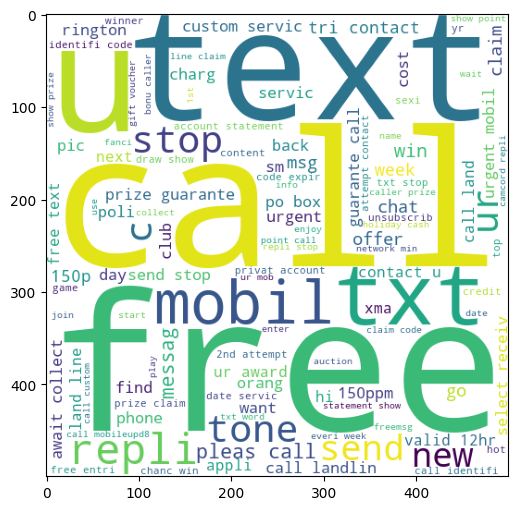

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep=" "))

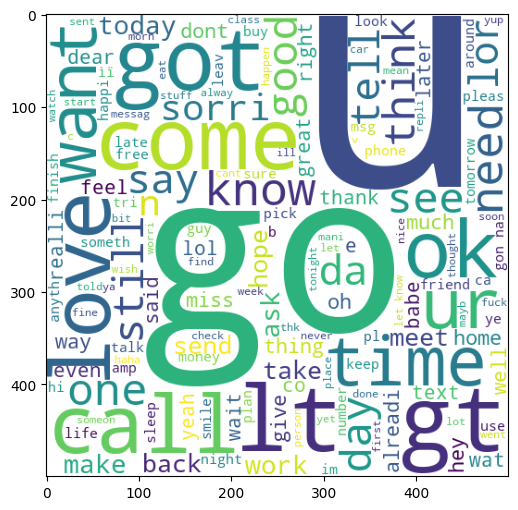

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [49]:
len(spam_corpus)

9939

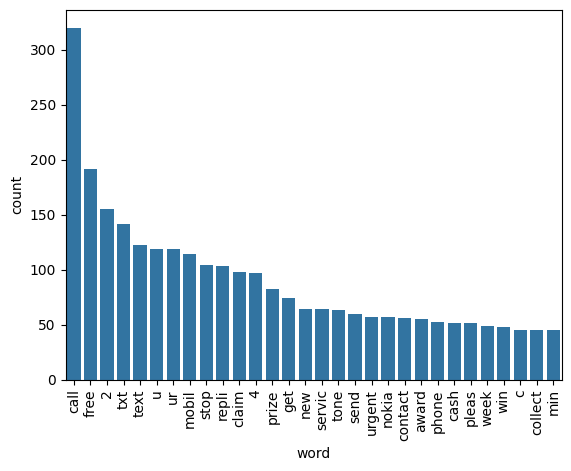

In [50]:
from collections import Counter
sns.barplot(
    x=pd.DataFrame(Counter(" ".join(df[df['target']==1]['transformed_text']).split()).most_common(30), columns=['word','count'])['word'],
    y=pd.DataFrame(Counter(" ".join(df[df['target']==1]['transformed_text']).split()).most_common(30), columns=['word','count'])['count']
)
plt.xticks(rotation='vertical')
plt.show()


In [51]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35404

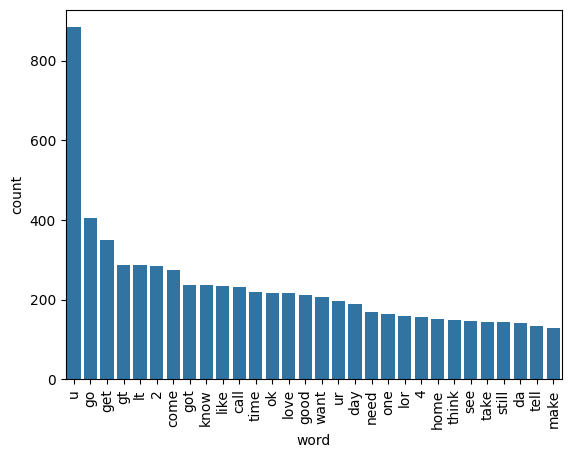

In [53]:
from collections import Counter
sns.barplot(
    x=pd.DataFrame(Counter(" ".join(df[df['target']==0]['transformed_text']).split()).most_common(30), columns=['word','count'])['word'],
    y=pd.DataFrame(Counter(" ".join(df[df['target']==0]['transformed_text']).split()).most_common(30), columns=['word','count'])['count']
)
plt.xticks(rotation='vertical')
plt.show()


__Model Building__

In [100]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [101]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [102]:
X.shape

(5169, 3000)

In [103]:
y = df['target'].values

In [104]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [107]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [108]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [109]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [110]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [111]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [112]:
#tfidf --> MNB

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [71]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9672131147540983)

In [72]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9672131147540983
For  KN
Accuracy -  0.9119922630560928
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8695652173913043
For  LR
Accuracy -  0.9545454545454546
Precision -  0.941747572815534
For  RF
Accuracy -  0.9796905222437138
Precision -  0.9915966386554622
For  AdaBoost
Accuracy -  0.9235976789168279
Precision -  0.8831168831168831
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8951612903225806
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9834710743801653
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.95
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.95


In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [74]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911992,1.000000
2,NB,0.973888,1.000000
5,RF,0.979691,0.991597
8,ETC,0.979691,0.983471
0,SVC,0.976789,0.967213
9,GBDT,0.953578,0.950000
10,xgb,0.970986,0.950000
4,LR,0.954545,0.941748
7,BgC,0.961315,0.895161
6,AdaBoost,0.923598,0.883117


In [75]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [76]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.911992
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.979691
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.976789
5,GBDT,Accuracy,0.953578
6,xgb,Accuracy,0.970986
7,LR,Accuracy,0.954545
8,BgC,Accuracy,0.961315
9,AdaBoost,Accuracy,0.923598


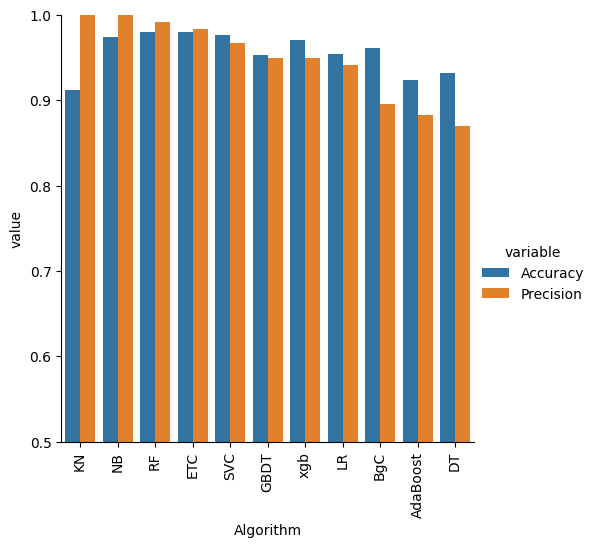

In [77]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
#model improve
#1.Change the max_features parameter of tfidf

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [81]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [82]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [84]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.911992,1.000000,0.911992,1.000000,0.911992,1.000000,0.911992,1.000000
1,NB,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
2,RF,0.979691,0.991597,0.979691,0.991597,0.979691,0.991597,0.979691,0.991597
3,ETC,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471
4,SVC,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213
5,GBDT,0.953578,0.950000,0.953578,0.950000,0.953578,0.950000,0.953578,0.950000
6,xgb,0.970986,0.950000,0.970986,0.950000,0.970986,0.950000,0.970986,0.950000
7,LR,0.954545,0.941748,0.954545,0.941748,0.954545,0.941748,0.954545,0.941748
8,BgC,0.961315,0.895161,0.961315,0.895161,0.961315,0.895161,0.961315,0.895161
9,AdaBoost,0.923598,0.883117,0.923598,0.883117,0.923598,0.883117,0.923598,0.883117


In [85]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [86]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [87]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9916666666666667


In [89]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [90]:
from sklearn.ensemble import StackingClassifier

In [91]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [92]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9612403100775194


In [113]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))